# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
# Написал небольшую функцию для удобства
def get_descr(name):
    return df_descr[df_descr['ПОЛЕ']==name]['ОПИСАНИЕ'].values[0]

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
# EDIT: сделал функцией для дальнейших выводов при необходимости

def find_obj(df, show_elements = False):
    for i in df.columns: # перебираем все столбцы
        if str(df[i].dtype) == 'object': # если тип столбца - object
            print('='*10)
            print(i)
            if show_elements:
                # выводим название столбца
                print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
            print('\n') # выводим пустую строку
            
find_obj(df, show_elements = True)

EDUCATION
{'Два и более высших образования', 'Высшее', 'Ученая степень', 'Среднее', 'Неоконченное высшее', 'Неполное среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Государственная служба', 'Сельское хозяйство', 'Туризм', 'Управляющая компания', 'Нефтегазовая промышленность', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Логистика', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Транспорт', 'Банк/Финансы', 'Недвижимость', 'Образование', 'Наука', 'ЧОП/Детективная д-ть', 'Сборочные производства', 'Маркетинг', 'Информационные услуги', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Страхование', 'Информационные технологии', 'Другие сферы', 'Торговля', 'Подбор персонала'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
miss_values = df.isnull().any()

print('Пропущенные значения: %s\n'%miss_values.any())
print('Пропущенные значения присутствуют в столбцах:',*df.columns[miss_values], sep ='\n* ')

Пропущенные значения: True

Пропущенные значения присутствуют в столбцах:
* GEN_INDUSTRY
* GEN_TITLE
* ORG_TP_STATE
* ORG_TP_FCAPITAL
* JOB_DIR
* TP_PROVINCE
* REGION_NM
* WORK_TIME
* PREVIOUS_CARD_NUM_UTILIZED


В зависимости от типа самого признака (категориальный или количественный) можно использовать разные методы для устранения пропусков. Самыми простыми методами являются замены пропущенных значений на моду, среднее или медиану. При этом если признак является категориальным то лучше использовать моду (чтобы избежать появления вещественных значений в категориальных признаках). Для количественных может подойти как медиана, так и среднее значение.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Посмотрим на наши признаки с пропущенными значениями повнимательнее.

Выведем все признаки с пропусками, где укажем:
* название признака;
* его описание;
* его уникальные значения.

In [17]:
# Смотреть не будем. Очень много иначе выйдет из-за Work Time и Previous Card Num Utilized
#print('>'*5 + ' Features with missing values '+'<'*5+'\n')
#for feature in df.columns[miss_values]:
    #print('Name:',feature)
    #print('Description:',get_descr(feature))
    #print('Values:', set(df[feature]))
    #print('\n'+'-'*10+'\n')

>>>>> Features with missing values <<<<<

Name: GEN_INDUSTRY
Description: отрасль работы клиента
Values: {nan, 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика', 'Здравоохранение', 'Наука', 'ЧОП/Детективная д-ть', 'Торговля', 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Ресторанный бизнес/Общественное питание', 'Логистика', 'Салоны красоты и здоровья', 'Страхование', 'Подбор персонала', 'Строительство', 'Транспорт', 'Недвижимость', 'Развлечения/Искусство', 'Энергетика', 'Коммунальное хоз-во/Дорожные службы', 'Сельское хозяйство', 'Информационные технологии', 'Информационные услуги', 'Маркетинг', 'Банк/Финансы', 'Туризм', 'Сборочные производства', 'Образование', 'Государственная служба', 'Юридические услуги/нотариальные услуги'}

----------

Name: GEN_TITLE
Description: должность
Values: {nan, 'Военнослужащий по контракту', 'Индивидуальный предприниматель', 'Рабочий', 'Руководитель высшего звена', 'Партнер'

Все наши признаки, кроме WORK_TIME и PREVIOUS_CARD_NUM_UTILIZED, являются категориальными, что видно из их описания и значений.

**Следовательно:**

1) все пропуски в категориальных признаках можно заменить на моду;

2) пропуски в WORK_TIME лучше заменить на медиану (если убрать nan то можно заметить несколько выбросов, которые при использовании среднего могут дать менее надежные результаты);

3) PREVIOUS_CARD_NUM_UTILIZED - здесь в принципе (если верить документации) пропуски надо заменить на 0.

После устранения пропусков необходимо закодировать категориальные признаки, применяя one hot encoding, например, если признак имеет более двух принимаемых значений, т.е. не является бинарным.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #(1) Drop idx AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis = 1, inplace = True)
    
    #(2) Change types from str to int
    features = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for feature in features:
        df_output[feature] = df_output[feature].map(lambda x: x.replace(',', '.')).astype('float')
    
    #(3) Miss values
    miss_values_flag = df_output.isnull().any()
    miss_col = df_output.columns[miss_values_flag]
    # Определили в исследовании ранее, что посл два признака являются числовыми.
    #miss_col_c - категориальные признаки с пропусками. Числовые пропишем вручную для читабельности
    miss_col_c = miss_col[:-2]
    
    
    ## Categorial features
    ### Для категориальных используем моду для замены пропущенных
    for feature in miss_col_c:
        value = df_output[feature].mode()
        df_output[feature].fillna(value= value[0], inplace = True)
    
    ## Numeric features
    ### WORK_TIME - используем медиану для пропусков, т.к. она менее чувствительна к выбросам, а они тут есть
    value = df_output['WORK_TIME'].median()
    df_output['WORK_TIME'].fillna(value, inplace = True)
    
    ### PREVIOUS_CARD_NUM_UTILIZED - заменяем нулями, ибо это логично из описания признака
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace = True) 
    
    #(4) One-hot-encoding
    columns = [i for i in df_output.columns if str(df_output[i].dtype) == 'object']
    columns = columns[:-1] # Берем признаки кроме столбца метки выборки (обучение или тест)
    
    ## Извлекаем бинарный признак и вручную его кодируем (One hot encoding здесь не нужен)
    org_tp_fcapital = columns.pop(columns.index('ORG_TP_FCAPITAL')) 
    df_output[org_tp_fcapital].replace({'С участием':1, 'Без участия':0},inplace = True)
    
    # Для всех остальных категориальных признаков делаем one hot encoding
    df_output = pd.get_dummies(df_output, columns = columns)
    
    return df_output

In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
X, y = df_train_preproc.iloc[:,1:], df_train_preproc.iloc[:,0]
X_test, y_test = df_test_preproc.iloc[:,1:],   df_test_preproc.iloc[:,0]

In [20]:
X.shape, y.shape

((15223, 441), (15223,))

In [21]:
X_test.shape, y_test.shape

((14910, 441), (14910,))

#### Задание 5. Обучение и оценка качества разных моделей

In [ ]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

# Зачем это если у нас уже есть все матрицы?

## Your Code Here


In [22]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Раз интерфейс одинаковый, то можно создать функцию
def black_box(model,X_train,X_test,y_train, y_test):
    clf = model
    clf.fit(X_train, y_train)
    labels = clf.predict(X_train)
    proba = clf.predict_proba(X_train)
    return labels, proba

# Список наших алгоритмов
clf_all = [DecisionTreeClassifier(),
           RandomForestClassifier(),
           LogisticRegression()]

# Ответы для лейблов и вероятностей
answers_l = {}
answers_p = {}

# Запускаем наши черные ящики
for clf in clf_all:
    l,p = black_box(clf, X, X_test, y, y_test)
    answers_l[clf.__class__.__name__] = l
    answers_p[clf.__class__.__name__] = p

C:\Users\1096467\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [23]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Список наших метрик
estimates = [accuracy_score, precision_score,recall_score]

# Будущий словарь со значением метрик для классификатора
df_est = {}

for clf, label in answers_l.items():
    metrics = []
    for estimate in estimates:
        result = estimate(y_true = y, 
                          y_pred = label)
        metrics.append(result)
    df_est[clf] = metrics

# Для красоты и удобства сделаем датафрейм
df_est = pd.DataFrame(df_est, index = [estimate.__name__ for estimate in estimates])
df_est

,DecisionTreeClassifier,LogisticRegression,RandomForestClassifier
accuracy_score,1.0,0.880510,0.979570
precision_score,1.0,0.315789,1.000000
recall_score,1.0,0.003311,0.828366


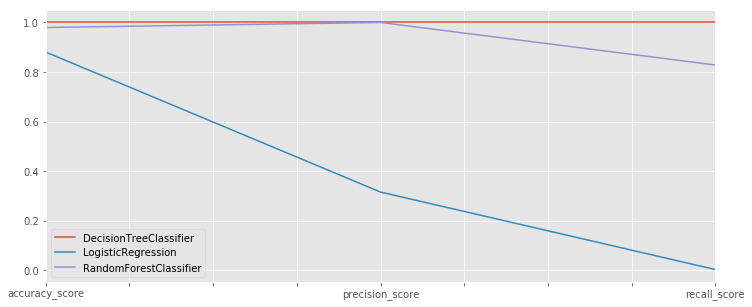

In [24]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

df_est.plot()

DecisionTreeClassifier: 1.000
RandomForestClassifier: 1.000
LogisticRegression: 0.698


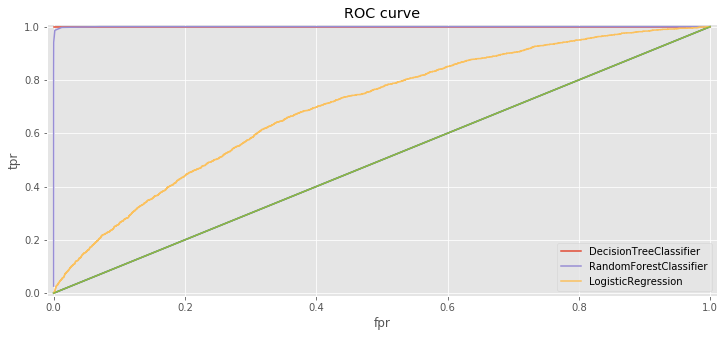

In [25]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve

for clf, proba in answers_p.items(): print('%s: %.3f'%(clf,roc_auc_score(y, proba[:,1])))

for clf, proba in answers_p.items():
    fpr, tpr, thresholds = roc_curve(y, proba[:,1])
    plt.plot(fpr, tpr, label = clf)
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.title('ROC curve') 
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))
    plt.legend()

In [26]:
from sklearn.cross_validation import cross_val_score
import numpy as np
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

for clf in clf_all:
    score = cross_val_score(clf, X, y, scoring='roc_auc', cv=10)
    print('%s: %.3f'%(clf.__class__.__name__, np.mean(score)))

C:\Users\1096467\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


DecisionTreeClassifier: 0.532
RandomForestClassifier: 0.600
LogisticRegression: 0.642


In [27]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
clf = LogisticRegression()
clf.fit(X,y)
predict = clf.predict_proba(X_test)
print(predict)
## Your Code Here

[[ 0.91764887  0.08235113]
 [ 0.95512995  0.04487005]
 [ 0.87271853  0.12728147]
 ..., 
 [ 0.89109211  0.10890789]
 [ 0.90970881  0.09029119]
 [ 0.85242088  0.14757912]]


C:\Users\1096467\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression:0.6821


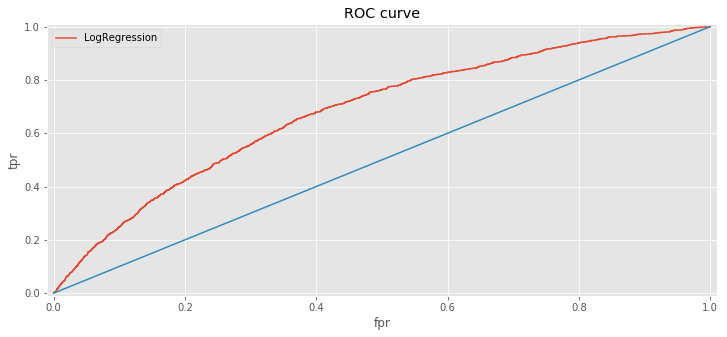

In [28]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.plot(fpr, tpr, label = 'LogRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve') 
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()


score = roc_auc_score(y_test, predict[:,1])
print('LogisticRegression:%.4f'%score)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)